# Exploring SDG&E Data

This data is downloaded in a different format than the other electricity grid data. Instead of line this the electric grid is in polygons. This notebook explores how to handle the polygon data.

### Explore the difference between the generation and load capacity
The definitions below are sourced from the SDG&E metadata. This was downloaded directly from the SDG&E website under the ICA User Guide it can be accessed [here](https://interconnectionmapsdge.extweb.sempra.com/#). 

- **Generation Capacity MW (ICA)** – the maximum amount of capacity available to connect to the distribution system
- **Load Capacity MW (LCA)** -  maximum amount of power available to be drawn from the distribution system

In [1]:
# load necessary libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box  # To create polygon bounding box
import glob
import os
import folium

In [ ]:
# make a bbox for the analysis
sd_bbox = box(-117.143449,32.739352,-117.099847,32.767431)

## SDG&E Load Capacity

In [3]:
# load SDGE load capacity data
sdge_load_capacity = gpd.read_file("../../../../capstone/electrigrid/data/utilities/sandiego_grid/ICA_MAP_PROD_LoadCapacityGrids.geojson")

In [4]:
# check the crs 
sdge_load_capacity.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
sdge_load_capacity.head()

,OBJECTID,VOLTAGE,LINE_SEGMENT_NUMBER,ICAWOF_UNIGENERATION,ICAWOF_UNILOAD,ICAWOF_PVGENERATION,OHUG,CIRCUIT_NAME,LABELTEXT,ICAWNOF_UNIGENERATION,ICAWNOF_UNILOAD,ICAWNOF_PVGENERATION,LABELTEXT_LCA,RESTRICTED,SUBID,ICAWOF_UNIGENERATION_LC,ICAWOF_UNILOAD_LC,ICAWNOF_UNIGENERATION_LC,geometry
0,31786423,12,156597,0.0,1.1,0.0,UG,597,None,0.0,1.1,0.4,1.00-1.50,N,SAN MARCOS,ICA_Operation_Flex,Load_Voltage,ICA_Voltage,"POLYGON ((-117.18286 33.10932, -117.18286 33.1..."
1,31786424,12,156597,0.0,1.1,0.0,UG,597,None,0.0,1.1,0.4,1.00-1.50,N,SAN MARCOS,ICA_Operation_Flex,Load_Voltage,ICA_Voltage,"POLYGON ((-117.18286 33.10898, -117.18286 33.1..."
2,31786425,12,156597,0.0,1.1,0.0,UG,597,None,0.0,1.1,0.4,1.00-1.50,N,SAN MARCOS,ICA_Operation_Flex,Load_Voltage,ICA_Voltage,"POLYGON ((-117.18286 33.10864, -117.18286 33.1..."
3,31786426,12,156597,0.0,1.1,0.0,UG,597,None,0.0,1.1,0.4,1.00-1.50,N,SAN MARCOS,ICA_Operation_Flex,Load_Voltage,ICA_Voltage,"POLYGON ((-117.18286 33.10829, -117.18286 33.1..."
4,31786427,12,156597,0.0,1.1,0.0,UG,597,None,0.0,1.1,0.4,1.00-1.50,N,SAN MARCOS,ICA_Operation_Flex,Load_Voltage,ICA_Voltage,"POLYGON ((-117.18286 33.10795, -117.18286 33.1..."


In [6]:
# dataframe size
sdge_load_capacity.shape

(477123, 19)

In [7]:
# check the load capacity geom type
sdge_load_capacity.geom_type

0         Polygon
1         Polygon
2         Polygon
3         Polygon
4         Polygon
           ...   
477118    Polygon
477119    Polygon
477120    Polygon
477121    Polygon
477122    Polygon
Length: 477123, dtype: object

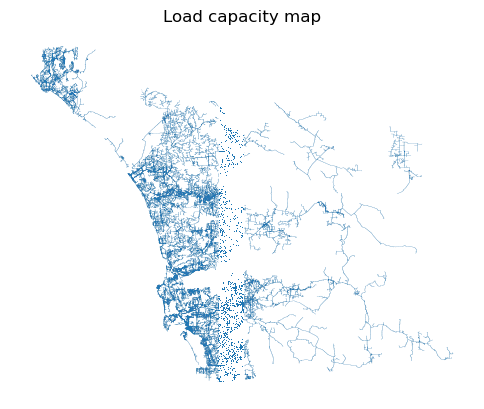

In [34]:
# initial plot of load capacity
fig, ax = plt.subplots()

sdge_load_capacity.plot(ax=ax)

ax.set_title('Load capacity map')
ax.axis('off')

plt.show()

## SDG&E Generation Capacity

In [9]:
# load SDGE generation capacity data
sdge_generation_capacity = gpd.read_file("../../../../capstone/electrigrid/data/utilities/sandiego_grid/ICA_MAP_PROD_GenerationCapacityGrids.geojson")

In [10]:
# check the size of the generation capacity
sdge_generation_capacity.shape

(477123, 19)

In [11]:
# check the type of geometry
sdge_generation_capacity.geom_type

0         Polygon
1         Polygon
2         Polygon
3         Polygon
4         Polygon
           ...   
477118    Polygon
477119    Polygon
477120    Polygon
477121    Polygon
477122    Polygon
Length: 477123, dtype: object

In [12]:
sdge_generation_capacity.head()

,OBJECTID,VOLTAGE,LINE_SEGMENT_NUMBER,ICAWOF_UNIGENERATION,ICAWOF_UNILOAD,ICAWOF_PVGENERATION,OHUG,CIRCUIT_NAME,LABELTEXT,ICAWNOF_UNIGENERATION,ICAWNOF_UNILOAD,ICAWNOF_PVGENERATION,LABELTEXT_ICA,RESTRICTED,SUBID,ICAWOF_UNIGENERATION_LC,ICAWOF_UNILOAD_LC,ICAWNOF_UNIGENERATION_LC,geometry
0,32500971,12,189790,0.0,2.1,0.2,OH,204,None,1.1,2.1,1.3,0,N,SAN MATEO,ICA_Operation_Flex,Load_Voltage,ICA_Voltage,"POLYGON ((-117.51529 33.39328, -117.51529 33.3..."
1,32500972,12,189790,0.0,2.1,0.2,OH,204,None,1.1,2.1,1.3,0,N,SAN MATEO,ICA_Operation_Flex,Load_Voltage,ICA_Voltage,"POLYGON ((-117.51529 33.39294, -117.51529 33.3..."
2,32500973,12,189790,0.0,2.1,0.2,OH,204,None,1.1,2.1,1.3,0,N,SAN MATEO,ICA_Operation_Flex,Load_Voltage,ICA_Voltage,"POLYGON ((-117.51611 33.39362, -117.51611 33.3..."
3,32500974,12,189790,0.0,2.1,0.2,OH,204,None,1.1,2.1,1.3,0,N,SAN MATEO,ICA_Operation_Flex,Load_Voltage,ICA_Voltage,"POLYGON ((-117.51611 33.39328, -117.51611 33.3..."
4,32500975,12,846583,0.0,3.0,0.2,OH,204,None,0.1,3.0,0.7,0,N,SAN MATEO,ICA_Operation_Flex,Load_Voltage,ICA_Voltage,"POLYGON ((-117.55531 33.37352, -117.55532 33.3..."


In [13]:
# check CRS
sdge_generation_capacity.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [14]:
type(sdge_generation_capacity)

geopandas.geodataframe.GeoDataFrame

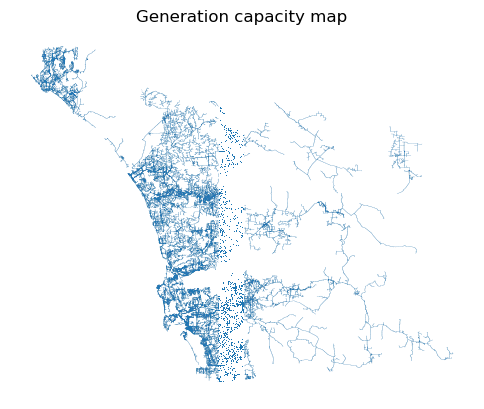

In [35]:
# initial plot of generation capacity
fig, ax = plt.subplots()

sdge_generation_capacity.plot(ax=ax)

ax.set_title('Generation capacity map')
ax.axis('off')

plt.show()

## Difference between the load and generation capacities

In [16]:
# make sure the crs match 
assert sdge_load_capacity.crs == sdge_generation_capacity.crs

Lets see if we can find the difference between the two capacity maps.

In [17]:
# calculate the difference between the generation and load capacity
load_gen_diff = sdge_generation_capacity["ICAWOF_UNILOAD"]- sdge_load_capacity["ICAWOF_UNILOAD"]

# make the series a data frame
load_gen_diff = load_gen_diff.to_frame()

# add a geometry layer
load_gen_diff["geometry"] = sdge_load_capacity["geometry"]

# make sure the type is a dataframe
type(load_gen_diff)

pandas.core.frame.DataFrame

Even though geometry was added the dataframe needs to be converted to a GeoPandas Dataframe for mapping. 

In [18]:
load_gen_diff = gpd.GeoDataFrame(load_gen_diff, 
                                 geometry = 'geometry')
load_gen_diff.head()

,ICAWOF_UNILOAD,geometry
0,1.0,"POLYGON ((-117.18286 33.10932, -117.18286 33.1..."
1,1.0,"POLYGON ((-117.18286 33.10898, -117.18286 33.1..."
2,1.0,"POLYGON ((-117.18286 33.10864, -117.18286 33.1..."
3,1.0,"POLYGON ((-117.18286 33.10829, -117.18286 33.1..."
4,1.9,"POLYGON ((-117.18286 33.10795, -117.18286 33.1..."


In [27]:
# check the range of values for the difference between the generation and load capacity
diff_min = load_gen_diff['ICAWOF_UNILOAD'].min()
diff_max = load_gen_diff['ICAWOF_UNILOAD'].max()

In [ ]:
# look at all the unique values
# list(load_gen_diff['ICAWOF_UNILOAD'].unique())

[1.0,
 1.9,
 1.8,
 1.1000000000000003,
 1.0000000000000002,
 0.9000000000000001,
 1.7,
 1.4000000000000001,
 1.3,
 2.8999999999999995,
 2.8,
 0.8,
 -0.3999999999999999,
 -0.09999999999999964,
 -0.9000000000000001,
 -0.10000000000000009,
 0.3999999999999999,
 1.2999999999999998,
 -1.0000000000000002,
 -1.4000000000000001,
 -1.1999999999999997,
 -0.19999999999999973,
 -2.2,
 0.5,
 0.6000000000000001,
 0.7,
 0.10000000000000009,
 1.5000000000000002,
 0.5000000000000001,
 0.0,
 -0.09999999999999987,
 3.0,
 3.1,
 0.40000000000000013,
 0.7000000000000002,
 -0.19999999999999996,
 2.2,
 0.20000000000000018,
 -3.4,
 -3.5,
 -4.3,
 -4.4,
 -0.30000000000000027,
 0.8000000000000003,
 1.2,
 2.0,
 0.09999999999999998,
 0.20000000000000007,
 -0.29999999999999993,
 0.8999999999999999,
 -0.30000000000000004,
 1.1,
 -0.6000000000000001,
 -0.5,
 -1.2000000000000002,
 -1.1,
 -0.8,
 -0.5999999999999996,
 1.7999999999999998,
 0.30000000000000027,
 1.6,
 1.4,
 0.30000000000000004,
 2.0999999999999996,
 1.1999

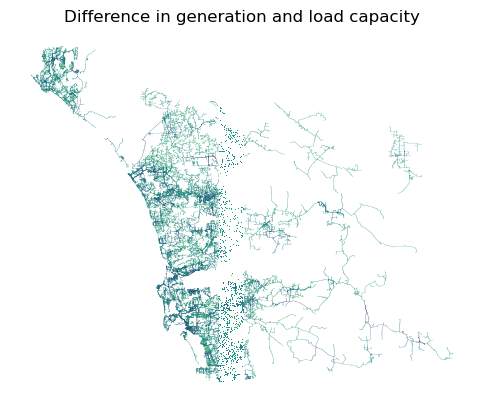

In [33]:
# plot the load gen differences 
fig, ax = plt.subplots()

load_gen_diff.plot(column = 'ICAWOF_UNILOAD',
                   ax=ax)
ax.set_title('Difference in generation and load capacity')
ax.axis('off')

plt.show()

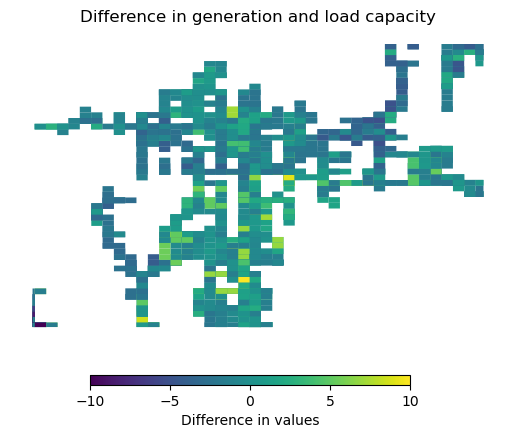

In [30]:
# use the San Diego bbox to make better analyze the findings
sd_load_gen_diff = gpd.clip(load_gen_diff, sd_bbox)

# plot the subset of load gen differences
fig, ax = plt.subplots()

sd_load_gen_diff.plot(column = 'ICAWOF_UNILOAD',
                      ax=ax)

ax.set_title('Difference in generation and load capacity')
ax.axis('off')

# Add shared colorbar at the bottom
sm = plt.cm.ScalarMappable( norm=plt.Normalize(vmin = diff_min, vmax = diff_max))
cbar_ax = fig.add_axes([0.25, 0.08, 0.5, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Difference in values')

plt.show()

There are some difference between generation and load. Most notably there are some negative values meaning that according to the data some locations are already drawing more data than is available to be connected to the distribution system.

# Connecting the Polygons

To riterate this analysis is relying on feeder line data. SDG&E holds feeder line data on polygons. We'll use `GeoPandas` `dissolve()` function to aggregate the polygons based on the `SUBID`. Geospatially, the load and generation capacity maps are the same. The generation capacity is most in line with the data from other utilities so it will be utilized for this analysis. 

In [23]:
# use subid to join the lines
sub_gen_capacity = sdge_generation_capacity.dissolve(by = 'SUBID')

# check the geometry types of the outcome
sub_gen_capacity.geom_type

SUBID
ALPINE                 Polygon
ARTESIAN RANCH         Polygon
ASH                    Polygon
AVOCADO           MultiPolygon
BARRETT                Polygon
                      ...     
URBAN                  Polygon
VALLEY CENTER          Polygon
VINE              MultiPolygon
WABASH CANYON          Polygon
WARNERS           MultiPolygon
Length: 104, dtype: object

The polygons are now joined by substation. 

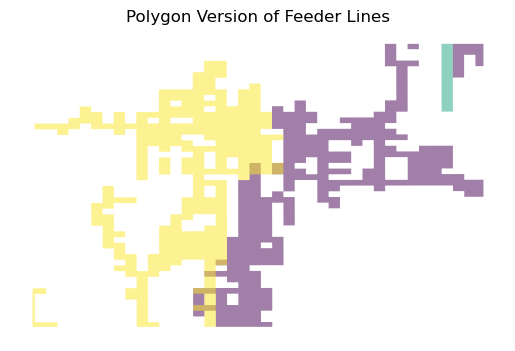

In [32]:
# use the San Diego bbox to make better view the outcome
sd_sub_gen_capacity = gpd.clip(sub_gen_capacity, sd_bbox)

# plot the subset of load gen differences
fig, ax = plt.subplots()

sd_sub_gen_capacity.plot(column = 'ICAWOF_UNILOAD',
                         alpha = 0.5,
                         ax=ax)

ax.set_title('Polygon Version of Feeder Lines')
ax.axis('off')


plt.show()

The polygons are bigger than the lines so we will need to brainstorm what the best methods for assigning homes to appropriate feeder lines. This will be especially challenging when the feeder lines overlap as shown in the yellow/purple overlap above. 

# Interactive map to show home distribution close to feeder lines

In [ ]:
# read in buildings data
buildings = gpd.read_parquet("../../../../capstone/electrigrid/data/buildings/w120_n35_w115_n30_zl_1_22.parquet")

ImportError: Missing optional dependency 'pyarrow.parquet'. pyarrow is required for Parquet support.  "
        "Use pip or conda to install pyarrow.parquet.